## Final Project Submission

Please fill out:
* Student name: Maliha Momtaj
* Student pace: self paced / part time / full time: Part time
* Scheduled project review date/time: Feb 1, 2022
* Instructor name: Claude Fried
* Blog post URL: https://dev.to/maliha1009/data-manipulation-in-python-4ag8


# Overview

Films are a big part of modern life. But with thousands of movies released each year, what makes certain movies into a phenomenon? What is it about select movies that capture the public’s attention and makes them successful? Is there a formula to it?

Descriptive analysis of IMDb, rt, imdb data reveal some components to consider while making a successful film.

Film Release Year

Genre

Producing Studio

Movie Runtime

Production Budget



# Business Problem
What components or factors to be considered while making a successful film?


# Data & Methods
This analysis is limited to data from IMDb, rt, tmdb. The metadata on films included in IMDb, rt, tmdb consist of year of release, genre, average ratings, movie run time, studio. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np

Dataframe tmdb to be exported and name as csv1. 
This dataframe has movie ratings, release date which will be used to find the correlation.

In [4]:
#export tmdb.movies.csv.gz as csv 1 into dataframe
csv1 = pd.read_csv("zippeddata/tmdb.movies.csv.gz") 
csv1.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Dataframe tn.movie to be exported and name as csv2. 
This dataframe has production budget which will be used to find the correlation.

In [5]:
#export tn.movie_budgets.csv.gz as csv 2 into dataframe
csv2 = pd.read_csv("zippeddata/tn.movie_budgets.csv.gz") 
csv2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Dataframe csv1 & csv2 will be merged or joined to get a complete file that list movie ratings, release date, budget. 
These data will be used to conduct the study.

In [6]:
#Merging csv2 & csv1 for the columns; prefix with popularity to make it distinct

df = csv2.set_index('movie').join(csv1.set_index('title'),lsuffix='popularity')
df

,idpopularity,release_datepopularity,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
#Horror,16,"Nov 20, 2015","$1,500,000",$0,$0,14656.0,"[18, 9648, 27, 53]",301325.0,de,#Horror,6.099,2015-11-20,3.3,102.0
(500) Days of Summer,55,"Jul 17, 2009","$7,500,000","$32,425,665","$34,439,060",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Cloverfield Lane,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422",17422.0,"[53, 878, 18]",333371.0,en,10 Cloverfield Lane,17.892,2016-03-11,6.9,4629.0
10 Days in a Madhouse,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616",15907.0,[18],345003.0,en,10 Days in a Madhouse,0.955,2015-11-20,5.4,7.0
10 Things I Hate About You,63,"Mar 31, 1999","$13,000,000","$38,177,966","$60,413,950",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mother!,59,"Sep 15, 2017","$30,000,000","$17,800,004","$42,531,076",20707.0,"[18, 27, 9648]",381283.0,en,mother!,15.227,2017-09-15,7.0,3458.0
xXx,98,"Aug 9, 2002","$70,000,000","$141,930,000","$267,200,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx: Return of Xander Cage,15,"Jan 20, 2017","$85,000,000","$44,898,413","$345,033,359",20651.0,"[28, 12, 80]",47971.0,en,xXx: Return of Xander Cage,21.749,2017-01-20,5.6,2452.0
Ã l\'intÃ©rieur,57,"Apr 15, 2008","$3,000,000",$0,"$895,932",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since movie ratings or popularity will be used for this analysis, any value "NaN" should be excluded from the popularity row.


In [7]:
#removing NaN, every row should have value

is_NaN = df[df['popularity']==np.NaN]
print(is_NaN.head())

Empty DataFrame
Columns: [idpopularity, release_datepopularity, production_budget, domestic_gross, worldwide_gross, Unnamed: 0, genre_ids, id, original_language, original_title, popularity, release_date, vote_average, vote_count]
Index: []


For the analysis, we would try to see if there is a specific genre get higher or lower rating. 
Therefore, we would create a collective column that will flag which genre the movie is.

In [8]:
# collective columns includes a specific genre
def is_genre(x, genre):
    try:
        if genre in x:
            return True
        else:
            return False
    except TypeError as te:
        return False

In [9]:
# to flag specific genre
def is_comedy(x):
    return is_genre(x, 'Comedy')

In [10]:
# to flag specific genre
def is_action(x):
    return is_genre(x, 'Action')
    

In [11]:
# to flag specific genre
def is_romance(x):
    return is_genre(x, 'Romance')

In [12]:
# to flag specific genre
def is_horror(x):
    return is_genre(x, 'Horror')

For this study, more dataframe to be loaded and named as name_basics to read in pandas.

In [13]:
#loading more data from imdb.name.basics.csv.gz
name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

In [14]:
# Following 2 fields were not used for this analysis.
#str that contain multiple values, value was not used

name_basics['known_for_titles']=name_basics.known_for_titles.str.split('.')
name_basics['primary_profession']=name_basics.primary_profession.str.split('.')

For this study, more dataframe to be loaded and read and named as title_basics.

In [15]:
#loading more values imdb.title.basics.csv
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [16]:
title_basics['genres'] = title_basics.genres.str.split(',')

In [17]:
#loading more values into dataframe
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [18]:
#loading more values into dataframe
title_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')

In [19]:
#loading more values into dataframe
title_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')

In [20]:
# to join files with ratings & basics
imdb_df = title_ratings.set_index('tconst').join(title_basics.set_index('tconst'))

In [21]:
#to flag specific genre
imdb_df['is_comedy']=imdb_df.genres.apply(is_comedy)

In [22]:
#to flag specific genre
imdb_df['is_action']=imdb_df.genres.apply(is_action)

In [23]:
#to flag specific genre
imdb_df['is_horror']=imdb_df.genres.apply(is_horror)

In [24]:
#to flag specific genre
imdb_df['is_romance']=imdb_df.genres.apply(is_romance)

The new combined file is as follows. This dataframe will be used to analyze and find correlation between movie ratings, run time, release year.

In [25]:
imdb_df

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,is_comedy,is_action,is_horror,is_romance
tconst,,,,,,,,,,,
tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,[Romance],False,False,False,True
tt10384606,8.9,559,Borderless,Borderless,2019,87.0,[Documentary],False,False,False,False
tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,[Drama],False,False,False,False
tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"[Action, Adventure, Fantasy]",False,True,False,False
tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"[Mystery, Thriller]",False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
tt9805820,8.1,25,Caisa,Caisa,2018,84.0,[Documentary],False,False,False,False
tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"[Action, Animation, Sci-Fi]",False,True,False,False
tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"[Action, Drama]",False,True,False,False


In [27]:
#loading more values into dataframe
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [28]:
#loading more values into dataframe
tn_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [29]:
#merging 2 files
ib_df = imdb_df.set_index('primary_title').join(bom_df.set_index('title'))

In [30]:
filtered_ib_df = ib_df[~np.isnan(ib_df['domestic_gross'])]

In [31]:
#to merge
all_df = filtered_ib_df.join(tn_budgets_df.set_index('movie'),rsuffix='_tn')

In [32]:
filtered_all_df = all_df[-np.isnan(all_df['id'])]

In [33]:
filtered_all_df.to_csv('output.csv')

In [34]:
#combined all csv files containing data from imdb, rt, tndb and renamed it as:

filtered_all_df

,averagerating,numvotes,original_title,start_year,runtime_minutes,genres,is_comedy,is_action,is_horror,is_romance,studio,domestic_gross,foreign_gross,year,id,release_date,production_budget,domestic_gross_tn,worldwide_gross
10 Cloverfield Lane,7.2,260383,10 Cloverfield Lane,2016,103.0,"[Drama, Horror, Mystery]",False,False,True,False,Par.,72100000.0,38100000,2016.0,54.0,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422"
12 Strong,6.6,50155,12 Strong,2018,130.0,"[Action, Drama, History]",False,True,False,False,WB,45800000.0,21600000,2018.0,64.0,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378"
12 Years a Slave,8.1,577301,12 Years a Slave,2013,134.0,"[Biography, Drama, History]",False,False,False,False,FoxS,56700000.0,131100000,2013.0,18.0,"Oct 18, 2013","$20,000,000","$56,671,993","$181,025,343"
127 Hours,7.6,323949,127 Hours,2010,94.0,"[Adventure, Biography, Drama]",False,False,False,False,FoxS,18300000.0,42400000,2010.0,6.0,"Nov 5, 2010","$18,000,000","$18,335,230","$60,217,171"
13 Sins,6.3,29550,13 Sins,2014,93.0,"[Horror, Thriller]",False,False,True,False,RTWC,13800.0,NaN,2014.0,51.0,"Apr 18, 2014","$4,000,000","$9,134","$47,552"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Youth,7.3,64418,Youth,2015,124.0,"[Comedy, Drama, Music]",True,False,False,False,FoxS,2700000.0,NaN,2015.0,99.0,"Dec 4, 2015","$13,000,000","$2,703,296","$24,001,573"
Zero Dark Thirty,7.4,251072,Zero Dark Thirty,2012,157.0,"[Drama, Thriller]",False,False,False,False,Sony,95700000.0,37100000,2012.0,66.0,"Dec 19, 2012","$52,500,000","$95,720,716","$134,612,435"
Zookeeper,5.2,52396,Zookeeper,2011,102.0,"[Comedy, Family, Romance]",True,False,False,True,Sony,80400000.0,89500000,2011.0,71.0,"Jul 8, 2011","$80,000,000","$80,360,866","$170,805,525"
Zoolander 2,4.7,59914,Zoolander 2,2016,101.0,[Comedy],True,False,False,False,Par.,28800000.0,27900000,2016.0,64.0,"Feb 12, 2016","$50,000,000","$28,848,693","$55,348,693"


Average Rating vs Movie Run Time:

The objective of following  represents is to determine any  correlation between movie run time and movie ratings. 
Based on the graph, movie runtime with < 115 minutes seem to have higher ratings, however runtime on x-axis are for every single minutes, therefore, a conclusion can not be made.
Any movie with higher than 115 minutes have =<6 ratings.

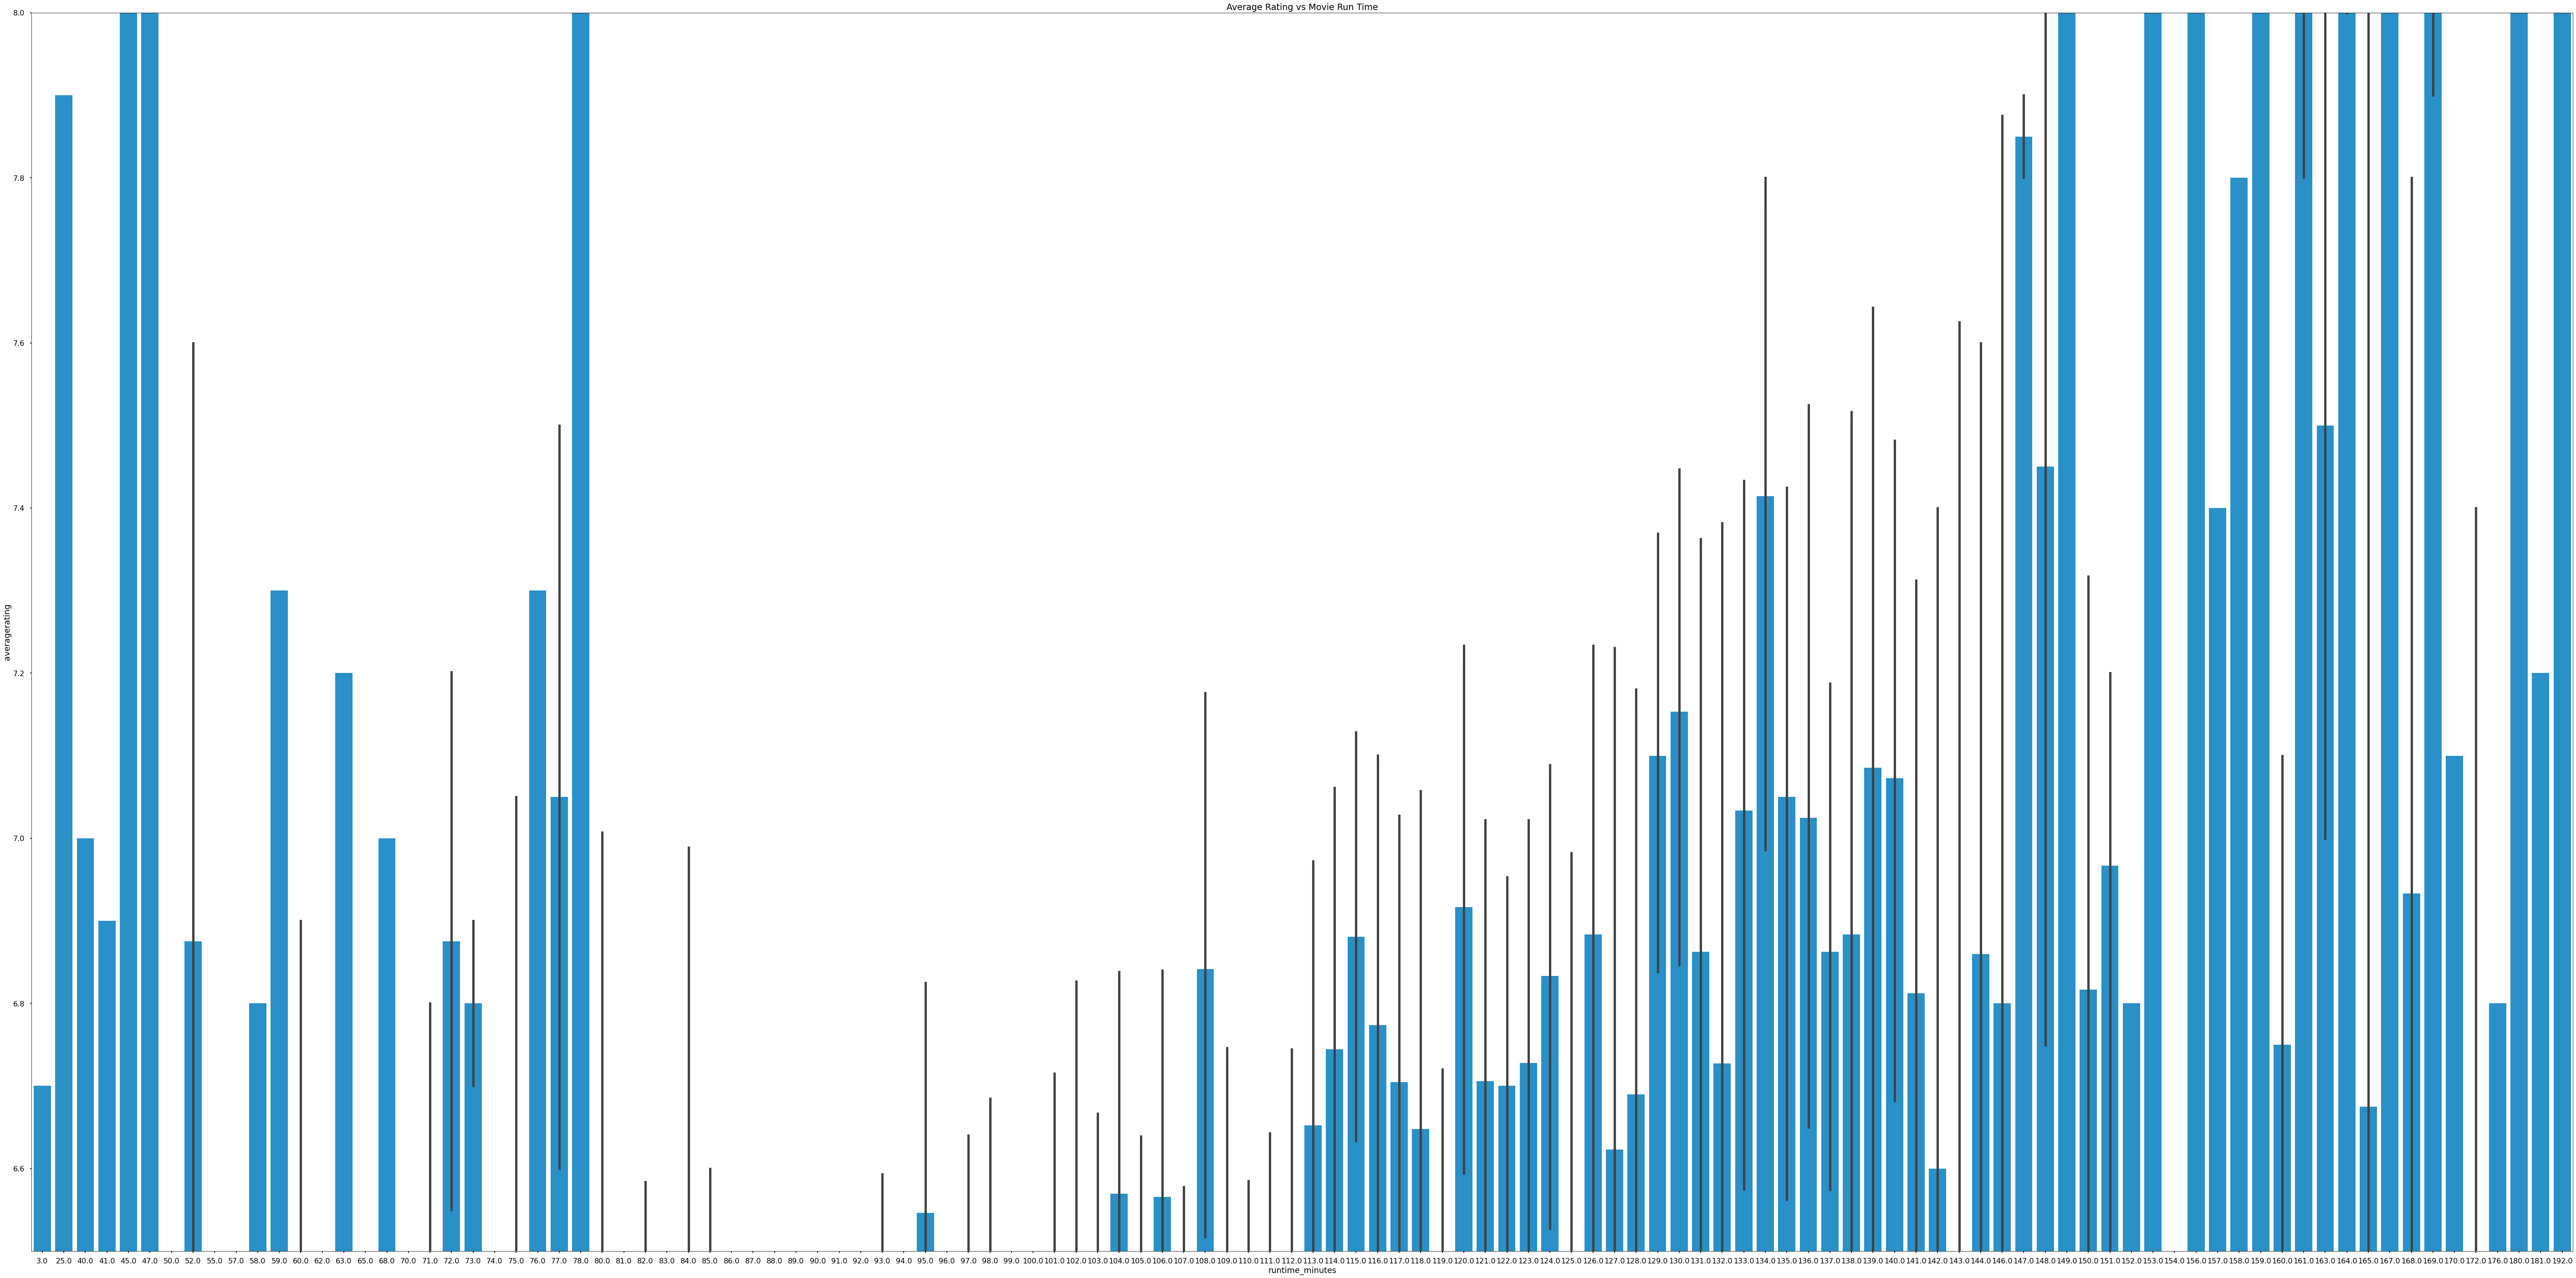

In [35]:
#To draw bar graph:
with plt.style.context("seaborn-poster"):
    
    plt.figure(figsize=(100,50))
    plt.title("Average Rating vs Movie Run Time")
    sns.barplot(x = 'runtime_minutes', y = 'averagerating', data = filtered_all_df)
    g=sns.barplot(x = 'runtime_minutes', y = 'averagerating', data = filtered_all_df, color="#0e98e3")
    g.set(ylim=(6.5, 8))

## Question 1: Movie Start Year
Does movie release year plays a role on being successful?

The following visualization represent the correlation between movie release year and movie ratings. 
Based on the plot, the decrease in ratings in 2010-2011 was presumably caused by the recession of 2008 to 2010.
But it also may be due to a reporting delay for low-budget films. 
Movies released in 2014 seem to have rated higher than previous year. This could be due to higher production budget and better marketing agenda.
The lower ratings for the year of 2017 can be caused by advertising campaigns, sequel fatigue or home streaming which became very popular in 2015 & onwards.

According to https://www.statista.com/statistics/187122/movie-releases-in-north-america-since-2001/, number of movie released in 2019 is the highest in last 20 years which explain the higher rating as well.


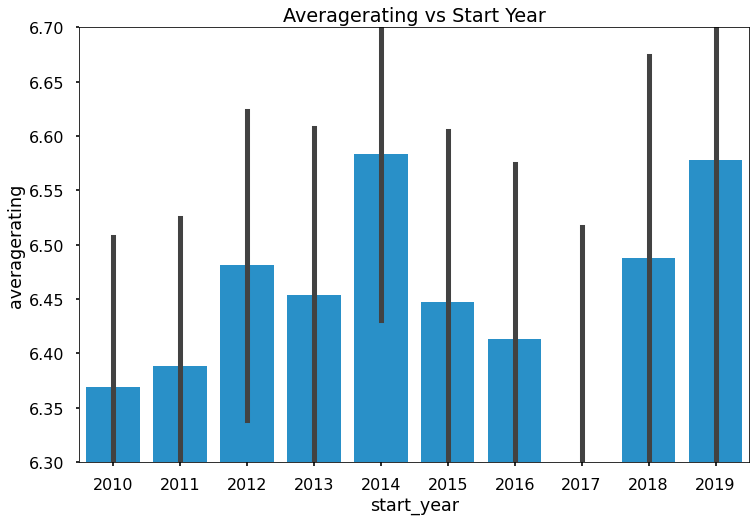

In [36]:
#To draw bar graph:
with plt.style.context("seaborn-poster"):
    
    plt.figure(figsize=(12,8))
    plt.title("Averagerating vs Start Year")
    g=sns.barplot(x = 'start_year', y = 'averagerating', data = filtered_all_df, color="#0e98e3")
    g.set(ylim=(6.3, 6.7))

## Question 2: Genre

Does film with specific genre achieve higher ratings?

Movie ratings are based on following genre: 

Action (6.39) > Romance (6.38) > Comedy (6.32) > Horror (5.7)

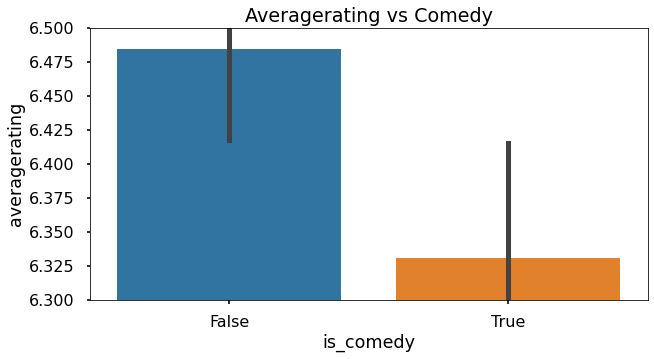

In [37]:
#To draw bar graph:
with plt.style.context("seaborn-poster"):
        
    plt.figure(figsize=(10,5))
    plt.title("Averagerating vs Comedy")
    g=sns.barplot(x = 'is_comedy', y = 'averagerating', data = filtered_all_df)
    g.set(ylim=(6.30, 6.5))

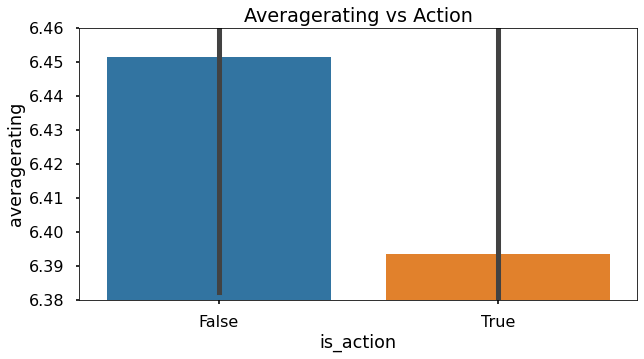

In [38]:
#To draw bar graph:
with plt.style.context("seaborn-poster"):
    
    plt.figure(figsize=(10,5))
    plt.title("Averagerating vs Action")
    g=sns.barplot(x = 'is_action', y = 'averagerating', data = filtered_all_df)
    g.set(ylim=(6.38, 6.46))

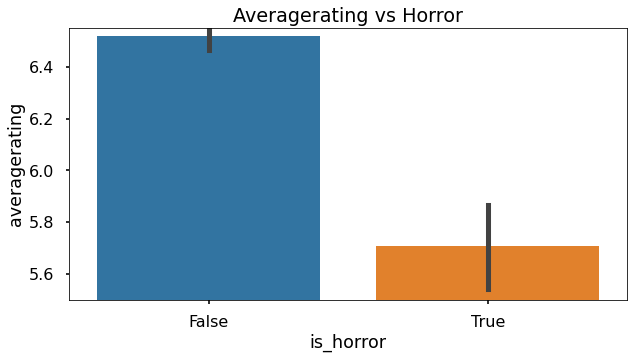

In [39]:
#To draw bar graph:
with plt.style.context("seaborn-poster"):
    
    plt.figure(figsize=(10,5))
    plt.title("Averagerating vs Horror")
    g=sns.barplot(x = 'is_horror', y = 'averagerating', data = filtered_all_df)
    g.set(ylim=(5.5, 6.55))

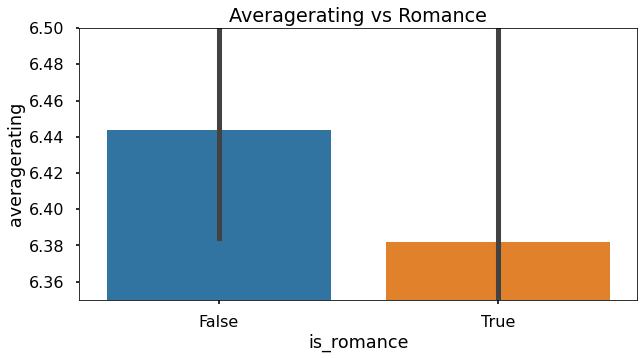

In [40]:
#To draw bar graph:
with plt.style.context("seaborn-poster"):
    
    plt.figure(figsize=(10,5))
    plt.title("Averagerating vs Romance")
    g=sns.barplot(x = 'is_romance', y = 'averagerating', data = filtered_all_df)
    g.set(ylim=(6.35, 6.50))

## Question 3: Producing Studio

Does choosing specific producing studio plays a role on successful film?
The following bar graph represent the correlation between average rating and studio.
The top ten producing studio are listed below which received average ratings of 7 or higher in the last 10 years. 

In [41]:
studio_df = filtered_all_df.groupby("studio").mean().reset_index()
studio_df.head()

,studio,averagerating,numvotes,start_year,runtime_minutes,is_comedy,is_action,is_horror,is_romance,domestic_gross,year,id
0,3D,6.900000,364.000000,2010.000000,41.000000,0.000000,0.000000,0.000000,0.000000,6.100000e+06,2010.00000,31.000000
1,A24,6.909524,109491.761905,2015.142857,104.666667,0.428571,0.095238,0.190476,0.190476,1.141252e+07,2015.52381,48.095238
2,ALP,6.750000,8910.500000,2013.000000,105.000000,0.000000,0.500000,0.000000,0.000000,2.800000e+03,2011.00000,52.000000
3,ATO,6.200000,16191.000000,2010.000000,108.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+06,2010.00000,32.000000
4,Affirm,6.350000,3441.000000,2017.500000,108.000000,0.000000,0.000000,0.000000,0.000000,1.170000e+07,2017.50000,53.500000


In [42]:
top_10_studio = studio_df.sort_values("averagerating", ascending=False).head(10)
top_10_studio.head()


,studio,averagerating,numvotes,start_year,runtime_minutes,is_comedy,is_action,is_horror,is_romance,domestic_gross,year,id
35,GrtIndia,8.3,65656.0,2017.0,167.0,0.0,1.0,0.0,0.0,20200000.0,2017.0,55.0
13,BSC,8.1,93243.0,2015.0,159.0,0.0,1.0,0.0,0.0,6700000.0,2015.0,21.0
52,Orch.,7.9,87532.0,2016.0,101.0,1.0,0.0,0.0,0.0,5200000.0,2016.0,25.0
9,App.,7.9,21919.5,2014.5,107.0,0.0,0.0,0.0,0.0,3600000.0,2010.0,57.0
44,MBox,7.6,217199.5,2012.0,120.0,0.0,0.0,0.0,0.0,6950000.0,2012.0,27.0


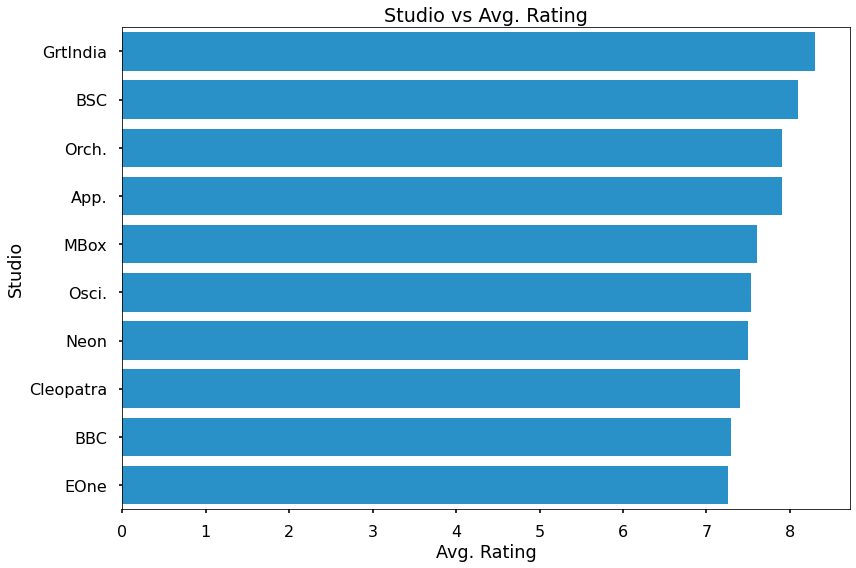

In [43]:
with plt.style.context("seaborn-poster"):
    fig, ax = plt.subplots(figsize=(12,8))
    sns.barplot(x='averagerating', y='studio', data=top_10_studio, ax=ax, color="#0e98e3")
    ax.set(
        title="Studio vs Avg. Rating", 
        xlabel="Avg. Rating",
        ylabel="Studio"
    )
    fig.tight_layout()

The following graph is to show the correlation between production_budget and worldwide_gross


Based on the graph, the production budget of =<$200,000,000 gives a movie higher worldwide gross. 

Though, there are some outliers present in the data.

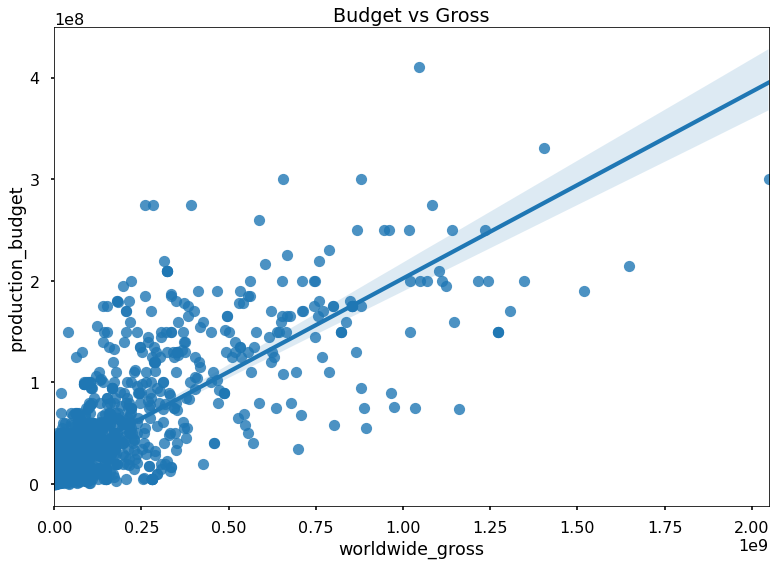

In [44]:
#correlation between production_budget and worldwide_gross
with plt.style.context("seaborn-poster"):
    
    y=filtered_all_df.production_budget.apply(lambda x: int(x.replace(',','').replace('$','')))
    x=filtered_all_df.worldwide_gross.apply(lambda x: int(x.replace(',','').replace('$','')))
    sns.regplot(x=x, y=y)
    plt.title("Budget vs Gross")

The following graph is to show the correlation between production_budget and domestic_gross


Based on the graph, the production budget of =<$200,000,000 gives a movie higher domestic gross.
Though, there are some outliers present in the data.

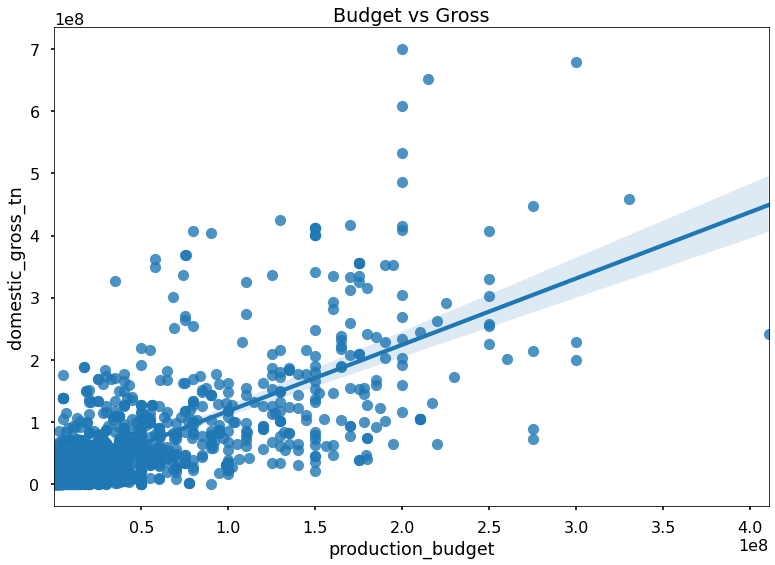

In [45]:
#correlation between production_budget and domestic_gross
with plt.style.context("seaborn-poster"):
    
    x=filtered_all_df.production_budget.apply(lambda x: int(x.replace(',','').replace('$','')))
    y=filtered_all_df.domestic_gross_tn	.apply(lambda x: int(x.replace(',','').replace('$','')))
    sns.regplot(x=x, y=y)
    plt.title("Budget vs Gross")

# Conclusions:
Based on the analysis performed above, the conclusion can be as follows:

-Question 1: Does movie release year plays a role on being successful?
Since movie released in 2010 was effect by recession from prior years, it is possible that movie released in 2022 may be effect by current pandemic situation. Though we can not foresee the exact impact of covid-19 on economy, but since businesses started opening up as well as theaters, year of 2022 and onward should be considered for film release year.

-Question 2: Does film with specific genre achieve higher ratings?
Based on this analysis, film ratings are based on specific genre are as follows:
Action (6.39) > Romance (6.38) > Comedy (6.32) > Horror (5.7) 
For the first time film producer, suggested genre should be action or romance

-Question 3: Does choosing specific producing studio plays a role on successful film?
Based on the analysis, the top ten producing studios receive average ratings of 7 or higher in the last 10 years. Choosing for producing studio from the list is suggested.

 


# Future Works:

Segmentation analysis

The film industry categorizes audiences in many different ways but often relies on an age-related scheme which closely follows the film certification categories (U, PG, 12A, 15, 18): Children (5-11 years old) Family groups. Teenagers / young couples / students. A segmentation analysis should be run to decide who is the targeted audience.

Marketing budget and pr strategies should be analyzed to have a much better understanding on how to allocate budgets.